# Spotify Top Hits Data Project

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)
sns.set_style("dark")

In [4]:
df = pd.read_csv('songs_normalize.csv')

## I. Data Investigation

In [5]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [6]:
df.shape

(2000, 18)

There are 2000 songs with 18 different characteristics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,2000.0,228748.124500,39136.569008,113000.000000,203580.00000,223279.50000,248133.000000,484146.000
year,2000.0,2009.494000,5.859960,1998.000000,2004.00000,2010.00000,2015.000000,2020.000
popularity,2000.0,59.872500,21.335577,0.000000,56.00000,65.50000,73.000000,89.000
danceability,2000.0,0.667438,0.140416,0.129000,0.58100,0.67600,0.764000,0.975
energy,2000.0,0.720366,0.152745,0.054900,0.62200,0.73600,0.839000,0.999
key,2000.0,5.378000,3.615059,0.000000,2.00000,6.00000,8.000000,11.000
loudness,2000.0,-5.512434,1.933482,-20.514000,-6.49025,-5.28500,-4.167750,-0.276
mode,2000.0,0.553500,0.497254,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,2000.0,0.103568,0.096159,0.023200,0.03960,0.05985,0.129000,0.576
acousticness,2000.0,0.128955,0.173346,0.000019,0.01400,0.05570,0.176250,0.976


### Song Duration
- Max: 8 Minutes
- Min: 1 Minutes
- Average: 3 Minutes

### Tempo
- Max: 210 bpm
- Min: 60 bpm
- Average: 120

## II. Data Exploration and Analysis

In [9]:
#Get descriptive stats for object columns
df.describe(exclude="number").T

,count,unique,top,freq
artist,2000,835,Rihanna,25
song,2000,1879,Sorry,5
explicit,2000,2,False,1449
genre,2000,59,pop,428


- Rihana is the top artist
- "Sorry" is the top song
- Pop is the most popular genre

In [10]:
#How many songs are released every year
df['year'].value_counts()

2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
1999     38
2020      3
1998      1
Name: year, dtype: int64

<AxesSubplot:>

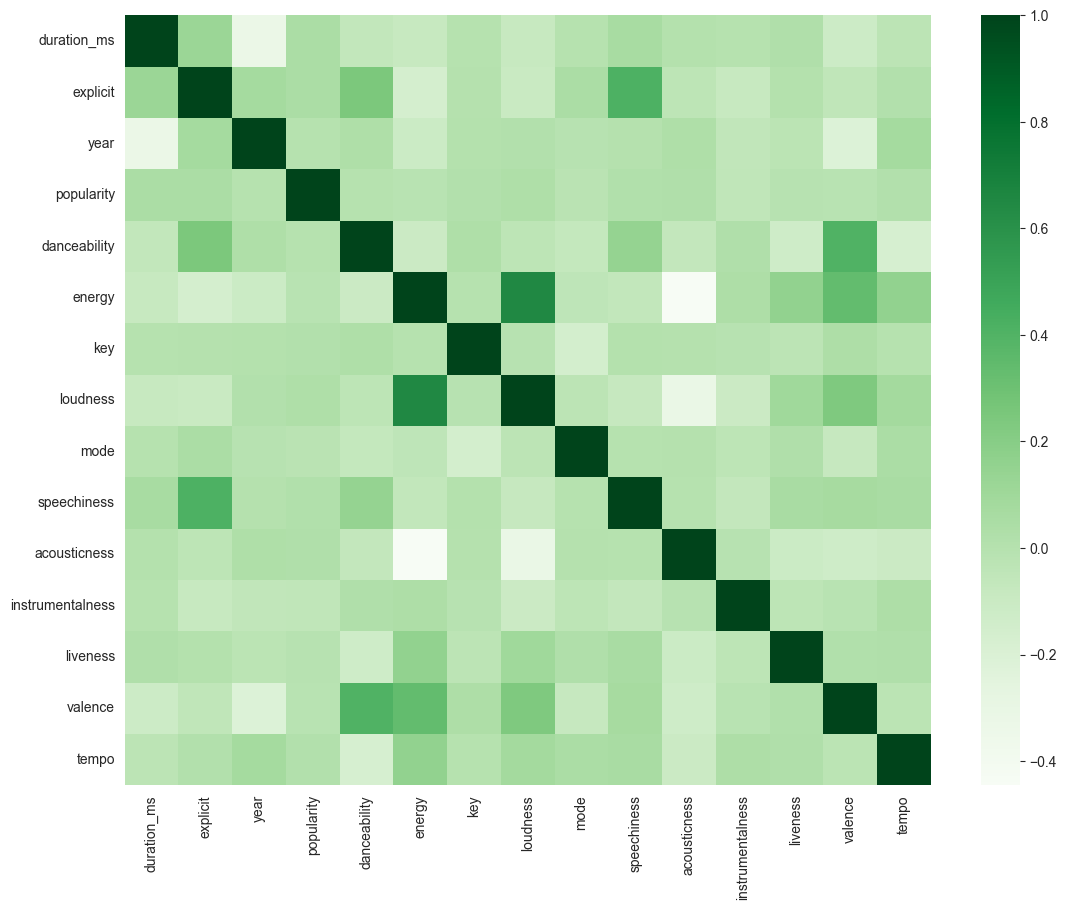

In [11]:
#How we look the correlations between each variable

fig, ax = plt.subplots(figsize=(13,10))

sns.heatmap(df.corr(), cmap = "Greens", ax = ax)

- We can see that speechiness is corrrelated to explicit
- Danceability and energy is correlated with valence (happy songs are often dancaeble)
- Energy is also strongly correlated with loudness (Upbeat energetic songs are often are louder)

In [22]:
fig = make_subplots(rows = 3, cols = 3, subplot_titles = ('<i> popularity','<i>danceability', '<i>energy', '<i> loudness', '<i> speechiness', '<i> acousticness', '<i> liveness', '<i>valence', '<i> tempo'))
fig.add_trace(go.Histogram(x= df['popularity'], name = 'popularity'), row = 1 , col = 1)
fig.add_trace(go.Histogram(x= df['danceability'], name = 'danceability'), row = 1 , col = 2)
fig.add_trace(go.Histogram(x= df['energy'], name = 'energy'), row = 1 , col = 3)
fig.add_trace(go.Histogram(x= df['loudness'], name = 'loudness'), row = 2 , col = 1)
fig.add_trace(go.Histogram(x= df['speechiness'], name = 'speechiness'), row = 2 , col = 2)
fig.add_trace(go.Histogram(x= df['acousticness'], name = 'acousticness'), row = 2, col = 3)
fig.add_trace(go.Histogram(x= df['liveness'], name = 'liveness'), row = 3, col = 1)
fig.add_trace(go.Histogram(x= df['valence'], name = 'valence'), row = 3 , col = 2)
fig.add_trace(go.Histogram(x= df['tempo'], name = 'tempo'), row = 3 , col = 3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

### Top 10 Artists with most top hits

Text(0, 0.5, 'Song Count')

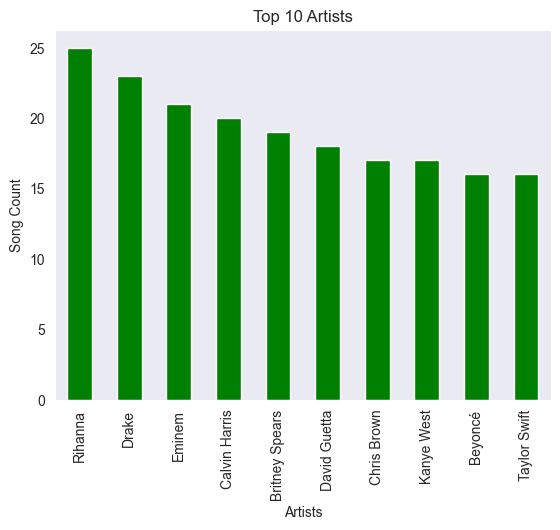

In [14]:
df['artist'].value_counts().head(10).plot(kind = 'bar', title ="Top 10 Artists", color = 'green')
plt.xlabel("Artists")
plt.ylabel("Song Count")

### Top 10 Genres

Text(0, 0.5, 'Song Count')

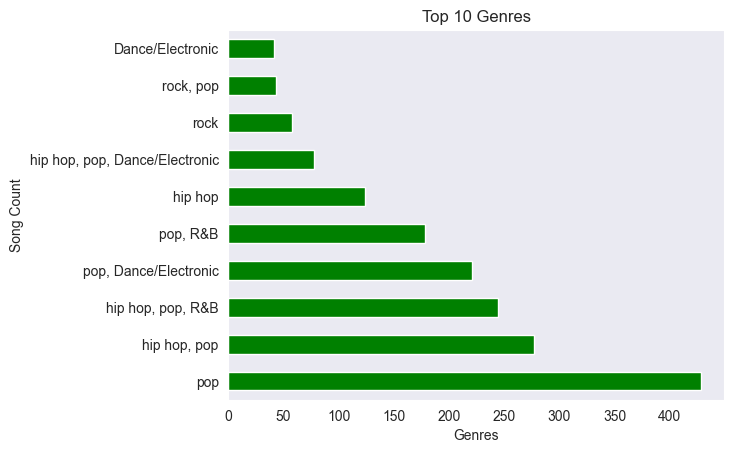

In [23]:
df['genre'].value_counts().head(10).plot(kind = "barh", title = "Top 10 Genres", color = 'green')
plt.xlabel("Genres")
plt.ylabel("Song Count")

### Top 25 songs in Spotify


In [25]:
fig=px.line(df.sort_values(by='popularity',ascending=False).head(25),x='song',y='popularity',hover_data=['artist'],color_discrete_sequence=['green'],template='plotly_dark',markers=True,title='<b> Top 25 songs in Spotify')
fig.show()

### Total Song based on genres

In [26]:
fig = px.histogram(df.groupby('genre',as_index = False).count().sort_values(by ='song',ascending=False),x='genre',y='song', color_discrete_sequence = ['green'], template = 'plotly_dark', marginal = 'box',title = '<b> Total songs based on genres')
fig.update_layout(title_x = 0.5)

### Explicity Distribution

Text(0, 0.5, 'Song Count')

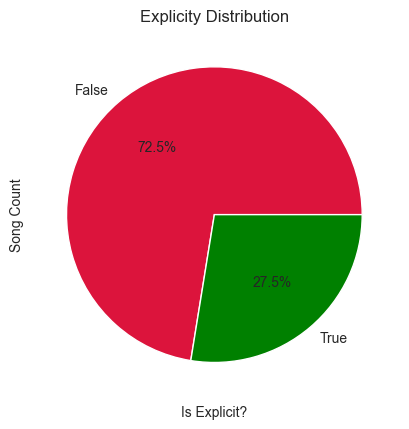

In [27]:
df['explicit'].value_counts().plot(kind = "pie", title = "Explicity Distribution", autopct='%1.1f%%', colors = ['crimson','green'])
plt.xlabel("Is Explicit?")
plt.ylabel("Song Count")

In [28]:
px.scatter(df, x = 'tempo', y = 'popularity', color = 'tempo', color_continuous_scale=px.colors.sequential.Plasma, template = 'plotly_dark', title = ' <b> Tempo Versus Popularity')

In [29]:
px.scatter(df, x = 'energy', y = 'popularity', color = 'energy', color_continuous_scale=px.colors.sequential.Plasma, template = 'plotly_dark', title = ' <b> Energy Versus Popularity')

In [30]:
px.scatter(df, x = 'danceability', y = 'popularity', color = 'danceability', color_continuous_scale=px.colors.sequential.Plasma, template = 'plotly_dark', title = ' <b> Danceability Versus Popularity')

### Stats Trend for Top 5 Artists over Time

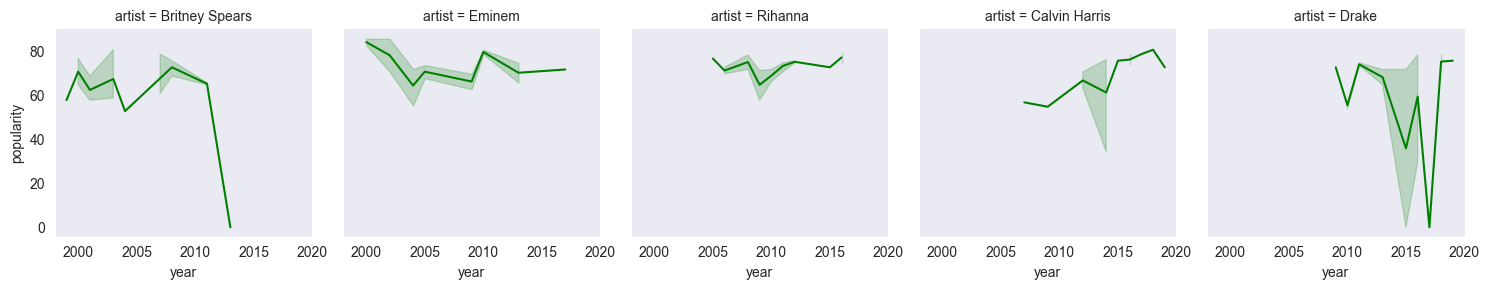

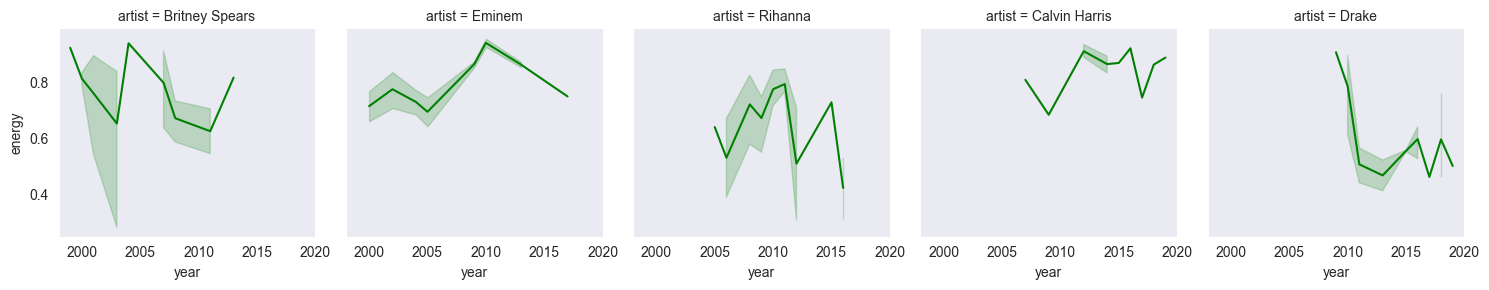

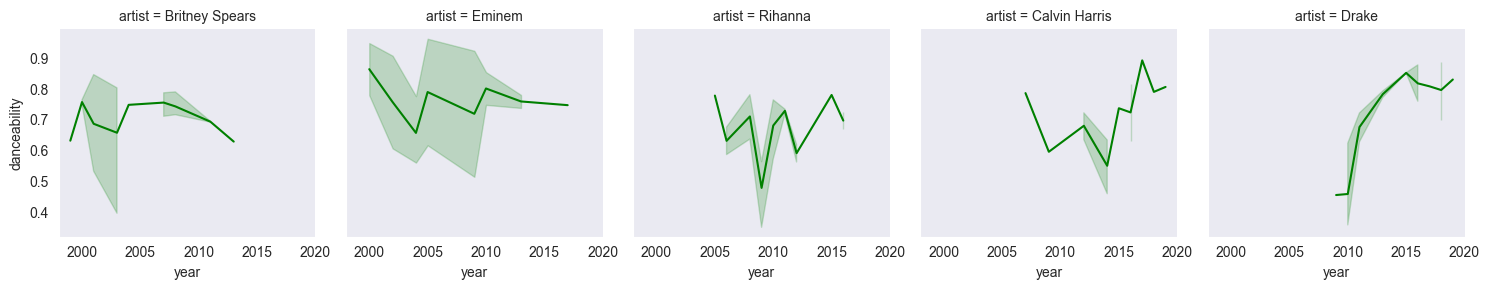

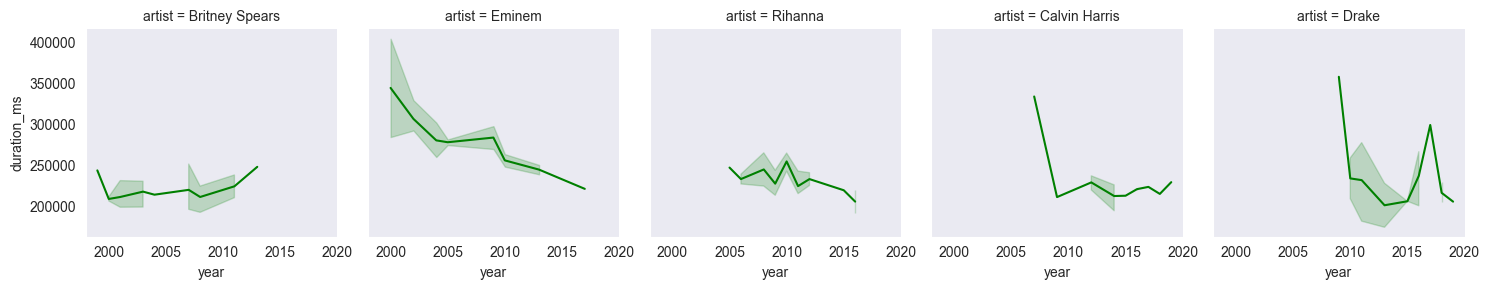

In [31]:
top_5 = df['artist'].value_counts().head(5).index

a = df[df['artist'].isin(top_5.to_list())]

for stat in ["popularity","energy","danceability","duration_ms"]:
    g = sns.FacetGrid(a, col="artist")
    g.map_dataframe(sns.lineplot, x="year",y=stat, color = 'green')

## III. Conclusion

* The top 3 artists by popularity are Rihanna, Drake and Eminem
* The top 3 songs by popularity are Sweater Weather (The Neighbourhood), Another Love (Tom Odell), Without Me (Eminem)
* The top genre by both popularity and total amount of songs is pop
* It seems like both energy and danceability are quite positively correlated with popularity
* Amongst the top 5 artists, Drake seems to have had the most stylistic change (music is more danceable but lower energy), while the artists with the biggest drop in popularity is Britney Spears